In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv


First few rows of the dataset:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0   

Dataset Dimensions: (6362620, 11)

Dataset Summary:
                    

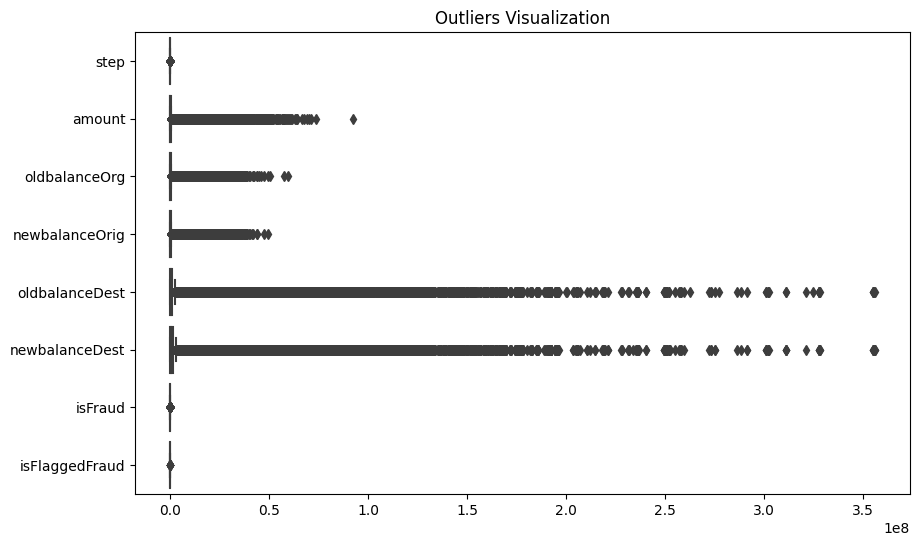


Logistic Regression Evaluation:
Accuracy: 1.00
Precision: 0.58
Recall: 0.06
F1 Score: 0.12
ROC AUC: 0.53


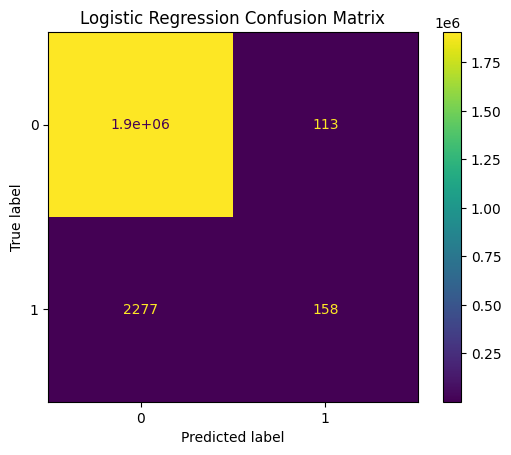

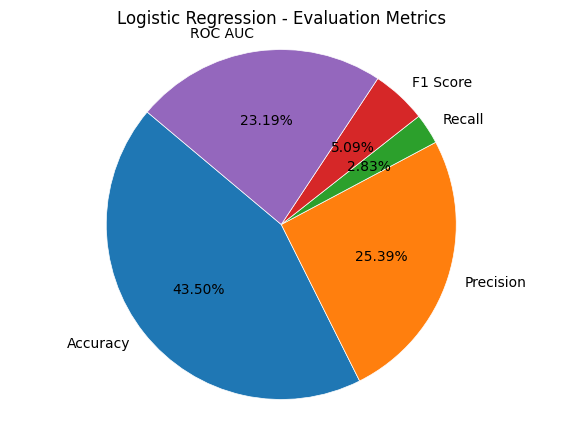


Decision Tree Evaluation:
Accuracy: 1.00
Precision: 0.80
Recall: 0.80
F1 Score: 0.80
ROC AUC: 0.90


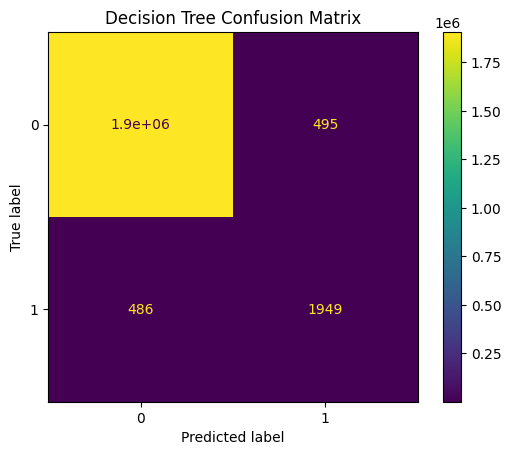

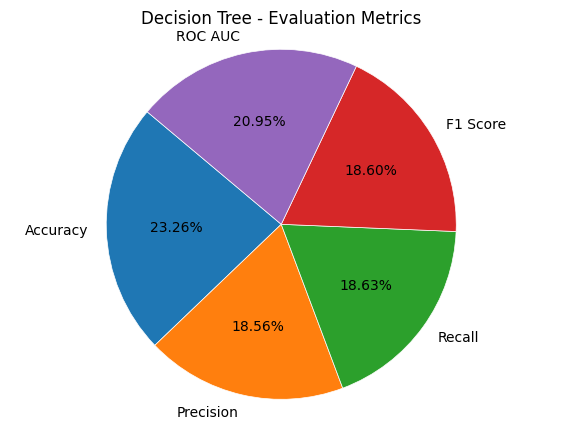


Naive Bayes Evaluation:
Accuracy: 1.00
Precision: 0.05
Recall: 0.10
F1 Score: 0.06
ROC AUC: 0.55


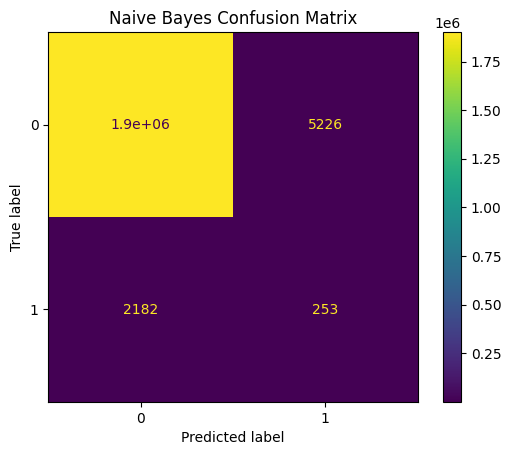

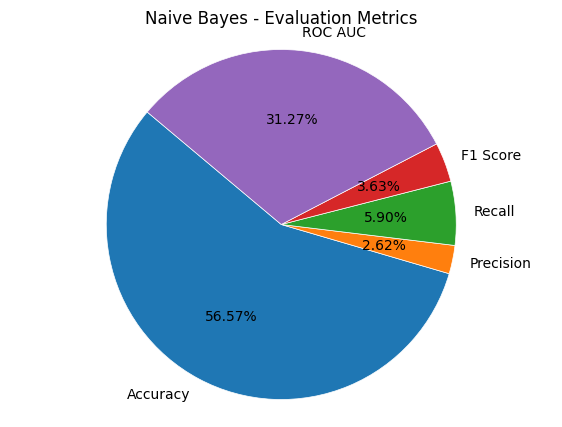


Model Evaluation Summary:
  Classification Model  Accuracy Rate
0  Logistic Regression          99.87
1        Decision Tree          99.95
2          Naive Bayes          99.61


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, 
                             precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay)
import warnings

warnings.filterwarnings('ignore')

# Load and preview dataset
def load_data(file_path):
    df = pd.read_csv(file_path)
    print("First few rows of the dataset:")
    print(df.head(), "\n")
    return df

# Initial Data Exploration
def explore_data(df):
    print(f"Dataset Dimensions: {df.shape}")
    print(f"\nDataset Summary:\n{df.describe().T}")
    print(f"\nData Types:\n{df.dtypes}")

# Handle missing values
def handle_missing_data(df):
    if df.isnull().values.any():
        print("Missing values detected. Dropping missing rows.")
        df.dropna(inplace=True)
    else:
        print("No missing values found.")
    return df

# Plotting outliers
def visualize_outliers(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, orient='h')
    plt.title("Outliers Visualization")
    plt.show()

# Plot value counts for a categorical column
def plot_category_counts(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f"{column} Value Counts")
    plt.show()

# Label encode categorical data
def encode_labels(df, column, mapping):
    df[column] = df[column].map(mapping)
    return df

# Split data into features and target
def prepare_features_target(df, target_column):
    features = df.drop(columns=[target_column])
    target = df[target_column]
    return features, target

# Scale data using StandardScaler
def scale_data(train_data, test_data):
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)
    return train_scaled, test_scaled

# Plot evaluation scores
def plot_scores(model_name, scores, score_names):
    """
    Visualize evaluation scores as a pie chart.

    Parameters:
    - model_name: str, the name of the model
    - scores: list, contains metric values (e.g., accuracy, precision, recall, etc.)
    - score_names: list, contains the corresponding metric names
    """
    plt.figure(figsize=(7, 5))
    plt.pie(
        scores,
        labels=score_names,
        autopct='%1.2f%%',
        startangle=140,
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'}
    )
    plt.title(f"{model_name} - Evaluation Metrics")
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
    plt.show()

# Evaluate model performance
def evaluate_model(name, model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print Metrics
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # Plot Scores
    scores = [accuracy, precision, recall, f1, roc_auc]
    score_names = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
    plot_scores(name, scores, score_names)

    return accuracy

# Main function for flow
def main():
    file_path = '/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv'
    data = load_data(file_path)

    # Exploratory Data Analysis
    explore_data(data)
    data = handle_missing_data(data)

    # Outlier Detection
    visualize_outliers(data)

    # Encode and clean data
    data = encode_labels(data, 'type', {'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2, 'TRANSFER': 3, 'DEBIT': 4})
    data.drop(columns=['nameOrig', 'nameDest', 'newbalanceOrig', 'oldbalanceDest'], inplace=True)

    # Data Splitting
    X, y = prepare_features_target(data, 'isFraud')
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
    x_train_scaled, x_test_scaled = scale_data(x_train, x_test)

    # Model training and evaluation
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Naive Bayes": GaussianNB()
    }

    # Store evaluation results
    model_names = []
    accuracy_rates = []

    for model_name, model in models.items():
        model.fit(x_train_scaled, y_train)
        accuracy = evaluate_model(model_name, model, x_test_scaled, y_test)
        model_names.append(model_name)
        accuracy_rates.append(round(accuracy * 100, 2))

    # Compile evaluation DataFrame
    evaluation = pd.DataFrame({
        'Classification Model': model_names,
        'Accuracy Rate': accuracy_rates
    })

    print("\nModel Evaluation Summary:")
    print(evaluation)

# Execute the main function
if __name__ == "__main__":
    main()
